In [1]:
import pandas as pd
df = pd.read_csv("Adult.csv")
df.head()

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [2]:
df = pd.read_csv("Adult.csv")
df=df.rename(columns={'education-num':'educationnum','marital-status':'maritalstatus','capital-gain':'capitalgain','capital-loss':'capitalloss','hours-per-week':'hoursperweek','native-country':'nativecountry'})
df.head()

,age,workclass,demogweight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [3]:
df["nativecountry"].value_counts()

United-States                 22421
Mexico                          488
?                               445
Philippines                     151
Germany                         102
Canada                           99
Puerto-Rico                      96
El-Salvador                      72
Cuba                             72
England                          72
India                            67
South                            64
China                            60
Jamaica                          58
Italy                            55
Dominican-Republic               54
Vietnam                          50
Guatemala                        50
Poland                           49
Japan                            48
Columbia                         45
Taiwan                           42
Haiti                            38
Iran                             35
Portugal                         28
Nicaragua                        25
Peru                             23
Greece                      

<h3>One data value for the native country is missing.<h3/>

In [4]:
indexNames = df[df['nativecountry'] == '?' ].index
df.drop(indexNames , inplace=True)
df['nativecountry'].value_counts()

United-States                 22421
Mexico                          488
Philippines                     151
Germany                         102
Canada                           99
Puerto-Rico                      96
Cuba                             72
El-Salvador                      72
England                          72
India                            67
South                            64
China                            60
Jamaica                          58
Italy                            55
Dominican-Republic               54
Vietnam                          50
Guatemala                        50
Poland                           49
Japan                            48
Columbia                         45
Taiwan                           42
Haiti                            38
Iran                             35
Portugal                         28
Nicaragua                        25
Peru                             23
Greece                           23
France                      

<h3> The potential downside of eliminating the rows with missing value is that, when we remove the rows with missing values the other data values in those rows may be also destroyed when the rows are eliminated and when the data becomes obtainable, it'll be very diffucult to make chances because we won't have any chance or space to enter the recently available data. </h3>`

In [5]:
(df.loc[df.workclass == "?", "workclass"] == "Unknown")

27       False
69       False
77       False
106      False
128      False
         ...  
24894    False
24902    False
24913    False
24949    False
24998    False
Name: workclass, Length: 1379, dtype: bool

<h3>In my point of view there isn't any potential downside of creating a specific category and showing the missing values replaced with "unknown." It will really make the data seem more obvious and will explain why a certain data characteristic is lacking value. However, it would be confusing and improper to depict it visually or to analyze the data and make decisions based on it.   </h3>

In [6]:
df["occupation"].value_counts()

Prof-specialty       3100
Craft-repair         3067
Exec-managerial      3030
Adm-clerical         2938
Sales                2763
Other-service        2496
Machine-op-inspct    1504
?                    1384
Transport-moving     1210
Handlers-cleaners     990
Farming-fishing       763
Tech-support          689
Protective-serv       498
Priv-house-serv       116
Armed-Forces            7
Name: occupation, dtype: int64

<h3> As a result, there is one missing value for occupation. <h3/>

In [7]:
indexNames = df[ df['occupation'] == '?' ].index
df.drop(indexNames , inplace=True)

<h3> Attribute occupation's data has one missing value which can be fixed by deleteting the missing value. <h3/>

In [8]:
df["occupation"].value_counts()

Prof-specialty       3100
Craft-repair         3067
Exec-managerial      3030
Adm-clerical         2938
Sales                2763
Other-service        2496
Machine-op-inspct    1504
Transport-moving     1210
Handlers-cleaners     990
Farming-fishing       763
Tech-support          689
Protective-serv       498
Priv-house-serv       116
Armed-Forces            7
Name: occupation, dtype: int64

<h3> In the previous step, I removed the missing value and the other rows in occupation data set that were linked with it. I did that since I didn't want to make any mistakes or have any problems when visually portraying it. The best course of action for solving this issue and fixing the data set seems to be eliminating the whole section <h3/>  

In [9]:
race_educ = df[['educationnum','race']]
race_educ

,educationnum,race
0,13,White
1,13,White
2,9,White
3,7,Black
4,13,Black
...,...,...
24994,9,White
24995,6,White
24996,9,White
24997,9,White


In [10]:
race_educ_mean =race_educ.groupby(['race'])['educationnum'].mean()

In [11]:
race_educ_mean.head

<bound method NDFrame.head of race
Amer-Indian-Eskimo     9.354545
Asian-Pac-Islander    11.034586
Black                  9.544486
Other                  8.642857
White                 10.175273
Name: educationnum, dtype: float64>

Text(0.5, 1.0, 'Average Education Level by Race')

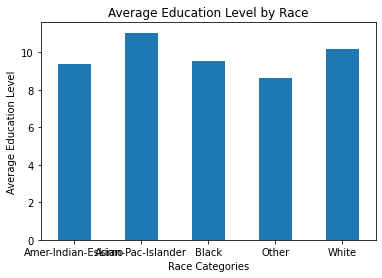

In [12]:
import matplotlib.pyplot as plot
ax = race_educ_mean.plot.bar(x="race", y="educationnum", rot=0)
ax.set_ylabel('Average Education Level')
ax.set_xlabel('Race Categories')
ax.set_title('Average Education Level by Race')

In [13]:
hours_sex = df[['hoursperweek','sex']]
hours_sex

,hoursperweek,sex
0,40,Male
1,13,Male
2,40,Male
3,40,Male
4,40,Female
...,...,...
24994,40,Male
24995,60,Male
24996,40,Male
24997,42,Female


In [14]:
hours_sex_mean =hours_sex.groupby(['sex'])['hoursperweek'].mean()

Text(0.5, 1.0, 'Average Hour Worked Per Week By Sex')

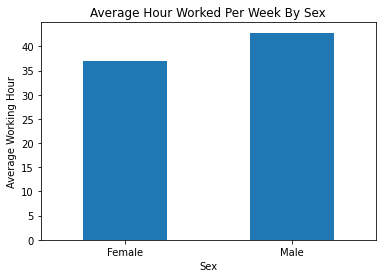

In [15]:
import matplotlib.pyplot as plot

bx = hours_sex_mean.plot.bar(x="sex", y="hours", rot=0)
bx.set_ylabel('Average Working Hour')
bx.set_xlabel('Sex')
bx.set_title('Average Hour Worked Per Week By Sex')

Text(0.5, 1.0, 'Age distribution')

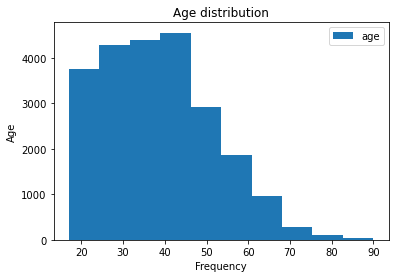

In [16]:
import matplotlib.pyplot as plot
age = df[['age']]
ax = age.plot.hist(bins = 10)
ax.set_ylabel('Age')
ax.set_xlabel('Frequency')
ax.set_title('Age distribution')